In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# no need to run this cell and the next one
import os
dir_path="../../project/MachineLearningCSV/MachineLearningCVE/"
file_list = os.listdir(dir_path)
file_list


['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [3]:
df_master = pd.DataFrame()
for file in file_list:
    df_temp = pd.read_csv(dir_path+file)
    df_master = pd.concat([df_master,df_temp],axis=0)
df_master.to_csv('combined_files.csv', sep=',', encoding='utf-8', index=False)

In [4]:
df=pd.read_csv('combined_files.csv')
df_value=df[' Label'].value_counts()
df2=df.drop_duplicates()


In [5]:
df2_value=df2[' Label'].value_counts()
datatype=df2.dtypes


In [6]:
df2.astype({'Flow Bytes/s':'float64',' Flow Packets/s':'float64'})
# df2.dtypes['Flow Bytes/s']
# df2.dtypes[' Flow Packets/s']


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
NaN_values=df2.isnull().sum()
print(NaN_values)
df2['Flow Bytes/s'].fillna(df2['Flow Bytes/s'].mean(),inplace=True)
# df2 = df2[np.isfinite(df2).all(1)]


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


C:\Users\dhruv\AppData\Local\Temp\ipykernel_11012\1844294477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Flow Bytes/s'].fillna(df2['Flow Bytes/s'].mean(),inplace=True)


In [8]:
df2 = df2[~np.isinf(df2['Flow Bytes/s'])]
np.where(df2['Flow Bytes/s'].values >= np.finfo(np.float64).max)
np.where(df2[' Flow Packets/s'].values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [9]:
print('Value count before dropping duplicates \n',df_value)
print('Shape before dropping duplicates {} '.format(df.shape))
print('Value count before after duplicates \n',df2_value)
print('Shape after dropping duplicates {} '.format(df2.shape))

Value count before dropping duplicates 
  Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64
Shape before dropping duplicates (2830743, 79) 
Value count before after duplicates 
  Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    53

In [10]:
df2.to_csv('final_dataset.csv',index=False,sep=',',encoding='UTF-8')

In [11]:
from numba import cuda

In [12]:
def get_cuda_cores():
    """
    Retrieve the number of CUDA cores in the GPU.
    """
    device = cuda.get_current_device()
    cuda_cores = device.MULTIPROCESSOR_COUNT * device.WARP_SIZE
    return cuda_cores

cuda_cores = get_cuda_cores()
print("CUDA Cores:", cuda_cores)


CUDA Cores: 512


In [13]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the current GPU
    current_gpu_name = torch.cuda.get_device_name(torch.cuda.current_device())
    print(f"Current GPU: {current_gpu_name}")
else:
    print("CUDA is not available. Using CPU.")

torch.cuda.is_available()

Number of available GPUs: 1
Current GPU: NVIDIA GeForce RTX 3050 Laptop GPU


True

In [14]:

# Load data from CSV file
csv_file_path = 'final_dataset.csv'
data = pd.read_csv(csv_file_path)
data


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2520794,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2520795,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2520796,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
# Extract features and labels from the CSV file
features = data.drop(' Label', axis=1).values
labels = data[' Label'].values
print(labels)

['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']


In [16]:
# Label Encoding the labels, since PyTorch can not take strings as dtype
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(labels)
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float64)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [18]:

# Check if CUDA (GPU support) is available  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [19]:
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

In [20]:

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, dropout_rate=0.1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1).to(torch.float64)
        self.bn1 = nn.BatchNorm1d(hidden_size1).to(torch.float64)  # Batch Normalization after the first hidden layer
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout after the first hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2).to(torch.float64)
        self.bn2 = nn.BatchNorm1d(hidden_size2).to(torch.float64)  # Batch Normalization after the second hidden layer
        self.dropout2 = nn.Dropout(dropout_rate)  # Dropout after the second hidden layer
        self.fc3 = nn.Linear(hidden_size2, hidden_size3).to(torch.float64)
        self.bn3 = nn.BatchNorm1d(hidden_size3).to(torch.float64)  # Batch Normalization after the third hidden layer
        self.dropout3 = nn.Dropout(dropout_rate)  # Dropout after the third hidden layer
        self.fc4 = nn.Linear(hidden_size3, output_size).to(torch.float64)

    def forward(self, x):
        x = self.dropout1(self.bn1(torch.relu(self.fc1(x))))  # Apply BatchNorm, Dropout, and ReLU
        x = self.dropout2(self.bn2(torch.relu(self.fc2(x))))  # Apply BatchNorm, Dropout, and ReLU
        x = self.dropout3(self.bn3(torch.relu(self.fc3(x))))  # Apply BatchNorm, Dropout, and ReLU
        x = self.fc4(x)
        return nn.functional.softmax(x, dim=1)


In [35]:
input_size = X_train.shape[1]  # Number of input features
hidden_size1 = 1024  # Number of neurons in the first hidden layer
hidden_size2 = 768  # Number of neurons in the second hidden layer
hidden_size3 = 512  # Number of neurons in the third hidden layer
output_size = torch.unique(y_train_tensor).size(0)
print(input_size)
print(output_size)

78
15


In [36]:

# Create an instance of the MLP model and move it to the GPU
model = MLP(input_size, hidden_size1, hidden_size2, hidden_size3, output_size).to(device)


In [37]:

# Define loss function and optimizer weight=class_weights.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [38]:

# Number of training epochs and batch size
num_epochs = 10
batch_size = 2048


In [39]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [40]:

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch_features, batch_labels in train_loader:
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Evaluation on the test data
    model.eval()
    correct = 0
    total = 0
    test_predictions = []
    test_true_labels = []
    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            outputs = model(batch_features)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()
            test_predictions.extend(predicted.cpu().numpy())
            test_true_labels.extend(batch_labels.cpu().numpy())

    accuracy = correct / total
    precision = precision_score(test_true_labels, test_predictions, average='weighted')
    recall = recall_score(test_true_labels, test_predictions, average='weighted')
    f1 = f1_score(test_true_labels, test_predictions, average='weighted')
    print(f'Train Accuracy: {accuracy * 100:.2f}%')
    print(f'Train Precision: {precision:.4f}')
    print(f'Train Recall: {recall:.4f}')
    print(f'Train F1 Score: {f1:.4f}')


Epoch [1/10], Loss: 1.9006


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 92.12%
Train Precision: 0.8837
Train Recall: 0.9212
Train F1 Score: 0.9011
Epoch [2/10], Loss: 1.8887


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 93.64%
Train Precision: 0.8977
Train Recall: 0.9364
Train F1 Score: 0.9161
Epoch [3/10], Loss: 1.8653


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 94.31%
Train Precision: 0.9045
Train Recall: 0.9431
Train F1 Score: 0.9228
Epoch [4/10], Loss: 1.8827


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 94.30%
Train Precision: 0.9044
Train Recall: 0.9430
Train F1 Score: 0.9227
Epoch [5/10], Loss: 1.8610


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 94.91%
Train Precision: 0.9411
Train Recall: 0.9491
Train F1 Score: 0.9352
Epoch [6/10], Loss: 1.8587


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 94.06%
Train Precision: 0.9378
Train Recall: 0.9406
Train F1 Score: 0.9207
Epoch [7/10], Loss: 1.8543


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 94.15%
Train Precision: 0.9373
Train Recall: 0.9415
Train F1 Score: 0.9225
Epoch [8/10], Loss: 1.8567


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 96.00%
Train Precision: 0.9551
Train Recall: 0.9600
Train F1 Score: 0.9531
Epoch [9/10], Loss: 1.8419


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 94.39%
Train Precision: 0.9412
Train Recall: 0.9439
Train F1 Score: 0.9267
Epoch [10/10], Loss: 1.8552


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 95.53%
Train Precision: 0.9516
Train Recall: 0.9553
Train F1 Score: 0.9457


In [41]:

# Evaluation on the test data
model.eval()
correct = 0
total = 0
test_predictions = []
test_true_labels = []
class_correct = [0 for _ in range(output_size)]
class_total = [0 for _ in range(output_size)]
with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
        test_predictions.extend(predicted.cpu().numpy())
        test_true_labels.extend(batch_labels.cpu().numpy())

        # For per class accuracy
        c = (predicted == batch_labels).squeeze()
        for i in range(len(batch_labels)):
            label = batch_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


In [42]:
# Per class accuracy
for i in range(output_size):
    if class_total[i] > 0:
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f'Accuracy for class {label_encoder.classes_[i]}: {accuracy:.2f}%')
    else:
        print(f'No samples for class {label_encoder.classes_[i]} in the test set.')


Accuracy for class BENIGN: 99.76%
Accuracy for class Bot: 0.00%
Accuracy for class DDoS: 94.75%
Accuracy for class DoS GoldenEye: 90.28%
Accuracy for class DoS Hulk: 89.58%
Accuracy for class DoS Slowhttptest: 79.37%
Accuracy for class DoS slowloris: 34.69%
Accuracy for class FTP-Patator: 0.00%
Accuracy for class Heartbleed: 0.00%
Accuracy for class Infiltration: 0.00%
Accuracy for class PortScan: 29.29%
Accuracy for class SSH-Patator: 0.00%
Accuracy for class Web Attack � Brute Force: 0.00%
Accuracy for class Web Attack � Sql Injection: 0.00%
Accuracy for class Web Attack � XSS: 0.00%


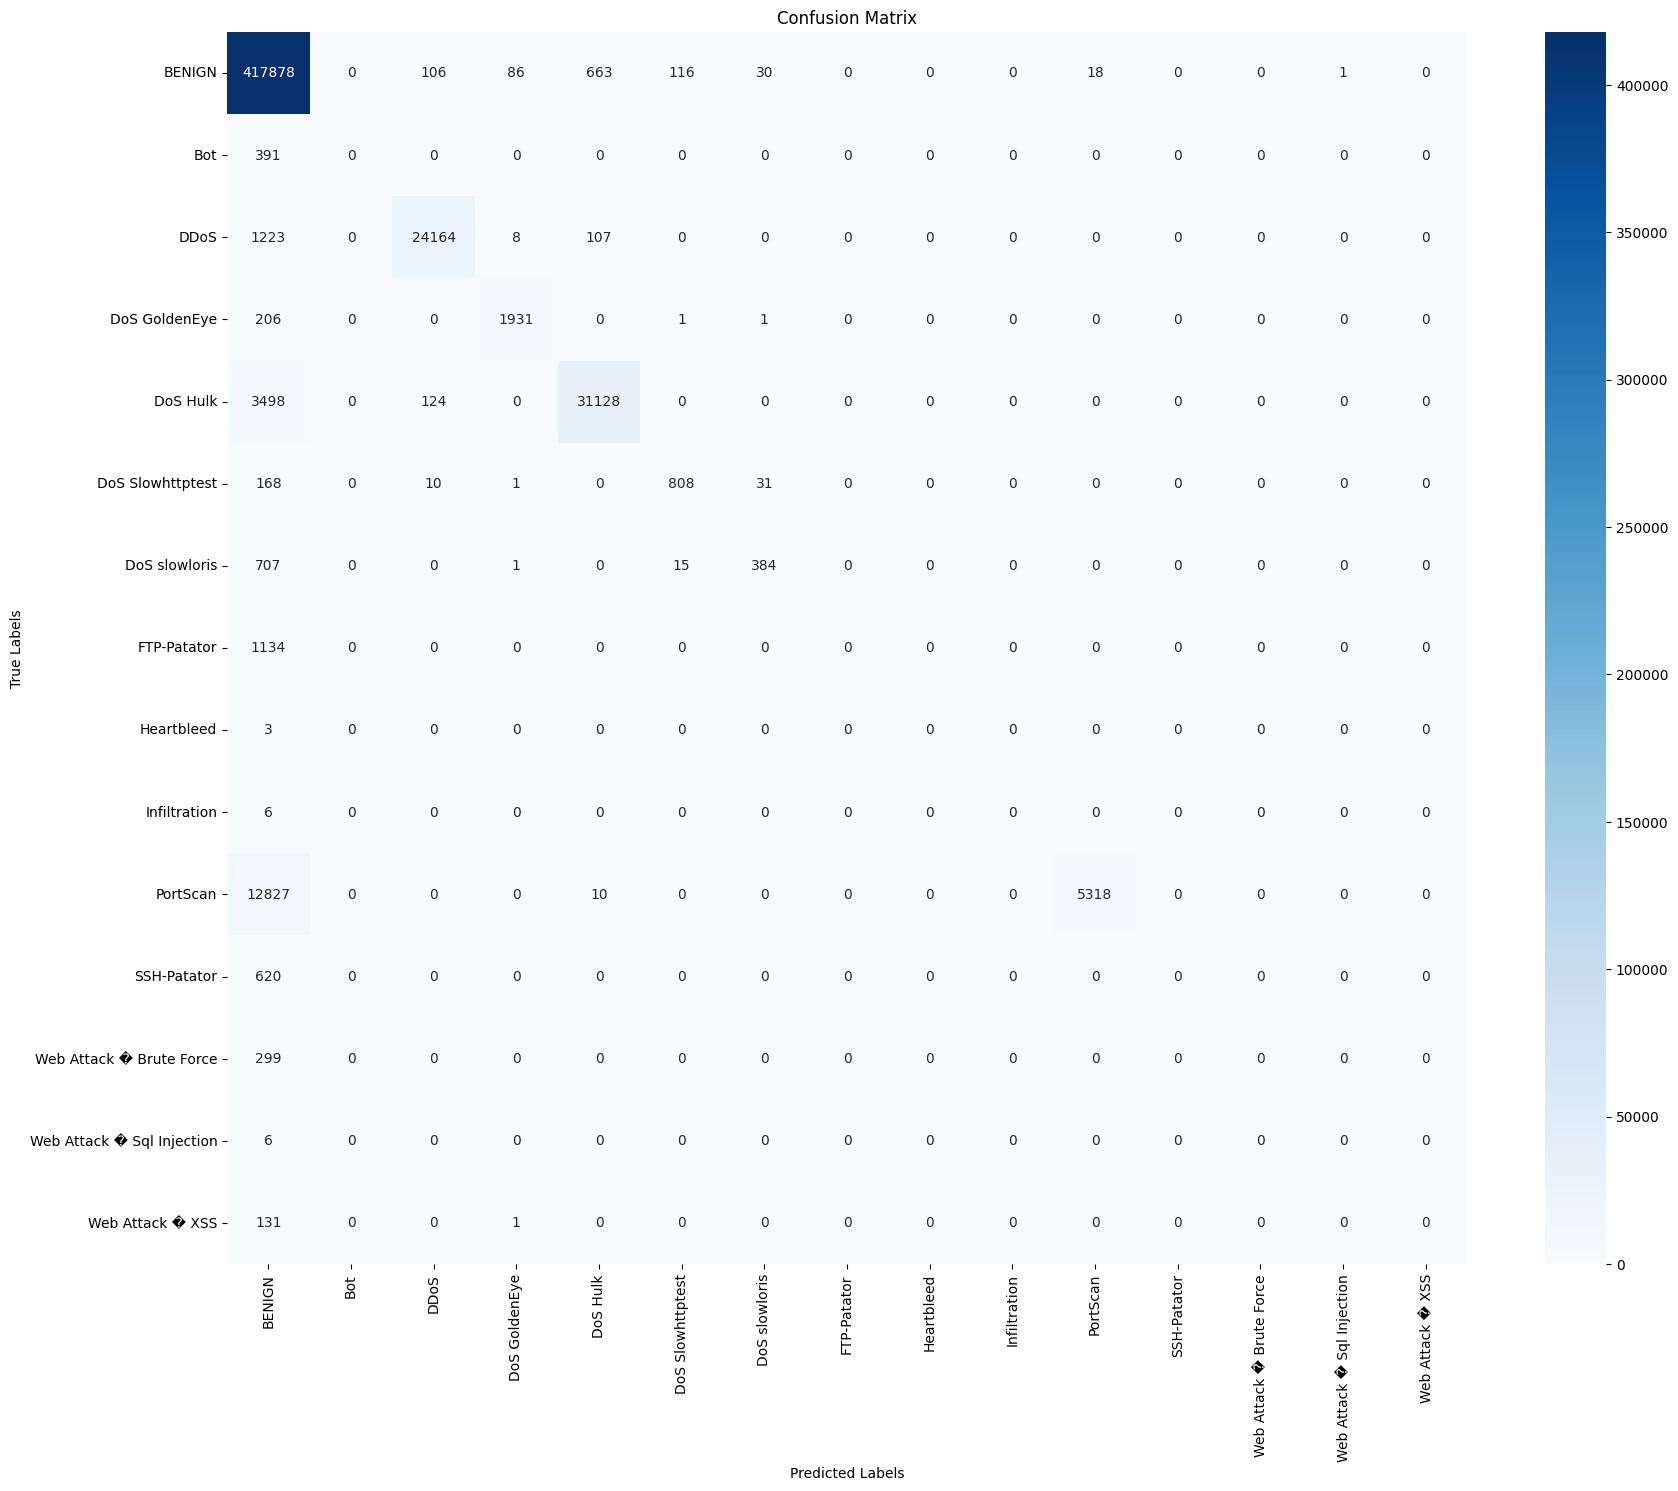

In [43]:

# Confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_predictions)
plt.figure(figsize=(20, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [44]:
# Overall performance of the model
accuracy = correct / total
precision = precision_score(test_true_labels, test_predictions, average='weighted')
recall = recall_score(test_true_labels, test_predictions, average='weighted')
f1 = f1_score(test_true_labels, test_predictions, average='weighted')
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


c:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 95.53%
Precision: 0.9516
Recall: 0.9553
F1 Score: 0.9457


## Feature

[(0.4612, ' Bwd Packet Length Std'), (0.2906, ' ECE Flag Count'), (0.1242, ' Bwd URG Flags'), (0.037, ' Subflow Bwd Packets'), (0.0325, ' Destination Port'), (0.011, ' Min Packet Length'), (0.0079, ' Bwd Packets/s'), (0.0069, ' Flow IAT Min'), (0.0058, ' min_seg_size_forward'), (0.0039, 'Bwd IAT Total'), (0.003, ' Subflow Bwd Bytes'), (0.0027, ' Flow Packets/s'), (0.002, ' Flow IAT Std'), (0.0011, ' Fwd Packet Length Std'), (0.0008, ' PSH Flag Count'), (0.0007, 'Fwd Packets/s'), (0.0006, 'Subflow Fwd Packets'), (0.0006, ' SYN Flag Count'), (0.0006, ' Fwd IAT Min'), (0.0006, ' Bwd IAT Std'), (0.0005, ' RST Flag Count'), (0.0004, 'Fwd IAT Total'), (0.0004, ' Total Backward Packets'), (0.0004, ' Fwd URG Flags'), (0.0004, ' Fwd Packet Length Max'), (0.0003, 'Flow Bytes/s'), (0.0003, ' Fwd Packet Length Min'), (0.0003, ' Fwd IAT Mean'), (0.0003, ' Flow IAT Max'), (0.0002, 'Total Length of Fwd Packets'), (0.0002, ' Total Length of Bwd Packets'), (0.0002, ' Subflow Fwd Bytes'), (0.0002, ' Fwd Header Length'), (0.0002, ' Flow IAT Mean'), (0.0002, ' Flow Duration'), (0.0002, ' Down/Up Ratio'), (0.0002, ' CWE Flag Count'), (0.0002, ' Bwd Header Length'), (0.0001, 'Bwd Packet Length Max'), (0.0001, 'Bwd Avg Bulk Rate'), (0.0001, ' Fwd Packet Length Mean'), (0.0001, ' Fwd IAT Std'), (0.0001, ' Bwd Packet Length Min'), (0.0001, ' Bwd Packet Length Mean'), (0.0001, ' Avg Fwd Segment Size'), (0.0001, ' Average Packet Size'), (0.0, 'Init_Win_bytes_forward'), (0.0, 'Idle Mean'), (0.0, 'Fwd PSH Flags'), (0.0, 'Fwd Avg Bytes/Bulk'), (0.0, 'FIN Flag Count'), (0.0, 'Active Mean'), (0.0, ' act_data_pkt_fwd'), (0.0, ' URG Flag Count'), (0.0, ' Total Fwd Packets'), (0.0, ' Packet Length Variance'), (0.0, ' Packet Length Std'), (0.0, ' Packet Length Mean'), (0.0, ' Max Packet Length'), (0.0, ' Init_Win_bytes_backward'), (0.0, ' Idle Std'), (0.0, ' Fwd IAT Max'), (0.0, ' Fwd Header Length.1'), (0.0, ' Fwd Avg Packets/Bulk'), (0.0, ' Fwd Avg Bulk Rate'), (0.0, ' Bwd PSH Flags'), (0.0, ' Bwd IAT Min'), (0.0, ' Bwd IAT Mean'), (0.0, ' Bwd IAT Max'), (0.0, ' Bwd Avg Packets/Bulk'), (0.0, ' Bwd Avg Bytes/Bulk'), (0.0, ' Avg Bwd Segment Size'), (0.0, ' Active Std'), (0.0, ' Active Min'), (0.0, ' Active Max'), (0.0, ' ACK Flag Count')]